# COMP1008 2020/21 Coursework - Credit Risk Prediction
<b>Student Name</b>: Sahil Rai<br>
<b>Student ID</b>: 20186501

## Task description

Credit scoring is an analysis by financial institutions to valuate a person's or business creditworthiness. You will work on a credit risk classification task based on a given dataset of 1000 customers' records collected at a bank. The aim is to help the bank manager to predict the credit risk of new customers and make better decisions on approving their loan applications.
- <b>Dataset</b>: <a href="https://moodle.nottingham.ac.uk/pluginfile.php/7184288/mod_tabbedcontent/tabcontent/21279/data-CreditRisk.xls">data-CreditRisk.xls</a>, available in Moodle COMP1008 page ('Course Content / Assessment')
- Coursework issue <a href="https://moodle.nottingham.ac.uk/pluginfile.php/7184288/mod_tabbedcontent/tabcontent/21279/Assessment%20Sheet%20COMP1008.docx">form</a>

Use this Jupyter Notebook file 'COMP1008cw.ipynb' as the template to write your report, answering the below questions and displaying the corresponding codes which support your answers.

In [1065]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import random
from matplotlib.pyplot import pie, axis, show

In [1066]:
df = pd.read_excel('data-CreditRisk.xls')
df

,ID,Age,Sex,Job,Housing,SavingAccounts,CheckAccount,CreditAmount,Duration,Purpose,Risk
0,0,67,male,2.0,own,NaN,little,1169.0,6.0,radio/TV,good
1,1,22,female,2.0,own,little,moderate,5951.0,48.0,radio/TV,bad
2,2,49,male,1.0,own,little,NaN,2096.0,12.0,education,good
3,3,45,male,2.0,free,little,little,7882.0,42.0,furniture/equipment,good
4,4,53,male,2.0,free,little,little,4870.0,24.0,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1.0,own,little,NaN,1736.0,NaN,furniture/equipment,good
996,996,40,male,3.0,own,little,little,3857.0,30.0,car,good
997,10,25,female,2.0,rent,little,moderate,1295.0,12.0,car,bad
998,17,25,male,2.0,own,NaN,little,8072.0,30.0,business,good


## Question 1. Data Analysis and Preparation (6 marks)

### 1a. Basic data analysis and plottings
Display your code and the appropriate plottings to support your answers to the following questions:
- Are most of the existing customers 'good' or 'bad' customers? [0.5 marks]<br>
- Are customers with shorter durations more likely to have good or bad credit? [0.5 marks]

<b>Answers</b>: 
- Most existing customers are 'good' customers
- Customers with very low durations have very low Credit Amount which can signify to have more 'good credit

In [1067]:
Counter = df['Risk'].value_counts().to_dict()
print(Counter)

{'good': 700, 'bad': 300}


Text(0, 0.5, 'Credit Amount')

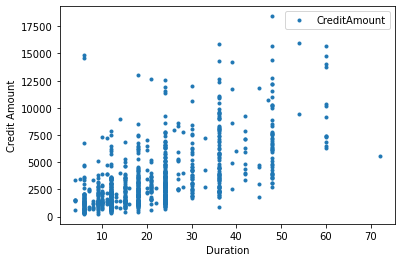

In [1068]:
df.plot(x='Duration', y='CreditAmount', style='.')
plt.xlabel('Duration')
plt.ylabel('Credit Amount')

Do male or female customers have higher CreditAmount on average? Do good customers have higher CreditAmount on average than bad customers? Disply the code and appropriate plottings to support your answers. [1 mark]

In [1069]:
Female_df = df.drop(df[df.Sex == 'male'].index)
Male_df = df.drop(df[df.Sex == 'female'].index)
Bad_df = df.drop(df[df.Risk == 'good'].index)
Good_df = df.drop(df[df.Risk == 'bad'].index)

# Averages for Sex
Female_avg = Female_df['CreditAmount'].mean()
print('Female Customer Average:',Female_avg)
Male_avg = Male_df['CreditAmount'].mean()
print('Male Customer Average:',Male_avg)

#Averages for Risk
Bad_avg = Bad_df['CreditAmount'].mean()
print('Bad Customer Average:',Bad_avg)
Good_avg = Good_df['CreditAmount'].mean()
print('Good Customer Average:',Good_avg)

Female Customer Average: 2877.7741935483873
Male Customer Average: 3456.3216885007278
Bad Customer Average: 3948.1304347826085
Good Customer Average: 2988.699140401146


<b>Answers</b>: 
- On Average Male customers have a higher average credit amount of 3456.3 & Female customers have 2877.8. 
- On Average Bad customers have a higher average credit amount of 3948.1 & Good customers have 2988.7. 

Analyse 'Housing' against customers' credit risks. Among customers of different 'Housing' types, which are more likely to have good credits? Provide the codea dn appropriate plotting(s) to support your answers. [0.5 marks]

<b>Answers</b>: 
- Overall all housing types are more likely to have good credit rather than bad. 
- Most likely people who own houses normally have Good credit score 

Housing among bad credit risk: {'own': 186, 'rent': 70, 'free': 44}
Housing among good credit risk: {'own': 527, 'rent': 109, 'free': 64}


Text(0.5, 0, 'Housing types')

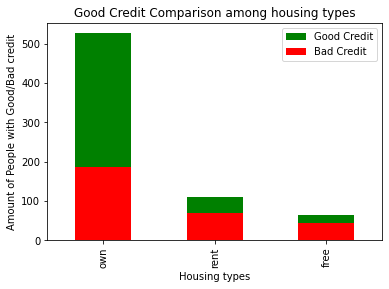

In [1070]:
Counter_BadH = Bad_df['Housing'].value_counts().to_dict()
print('Housing among bad credit risk:', Counter_BadH)
Counter_GoodH = Good_df['Housing'].value_counts().to_dict()
print('Housing among good credit risk:', Counter_GoodH)

Good_df['Housing'].value_counts().plot(kind='bar', color='g', label='Good Credit')
Bad_df['Housing'].value_counts().plot(kind='bar', color='r', label='Bad Credit')
plt.legend()
plt.title('Good Credit Comparison among housing types')
plt.ylabel('Amount of People with Good/Bad credit')
plt.xlabel('Housing types')



### 1b. Data Pre-processing

What issues do you observe in which of the input features in the data? Show the codes which detect these issues. What potential issues this may cause if the data is not pre-processed or processed inappropriately? [1 mark]<br>

<b>Answers</b>: 
- Job, SavingAccounts, CheckingAccount, CreditAmount, Duration all have null values present in their set
- There a lot non numeric data which can't be processed, thus needs to be turned into numbers

In [1071]:
df['Sex'] = (df['Sex'] !='male').astype(float)
df['Risk'] = (df['Risk'] !='good').astype(float)
# male = 0 & female = 1 

df['Housing'] = df['Housing'].apply({'own':0, 'free':1, 'rent':2}.get)
df['Housing'] = df.Housing.astype(float)


In [1072]:
df['SavingAccounts'] = df['SavingAccounts'].apply({'little':0, 'moderate':1, 'rich':2}.get)
df['SavingAccounts'] = df.SavingAccounts.astype(float)

In [1073]:
df['CheckAccount'] = df['CheckAccount'].apply({'little':0, 'moderate':1, 'rich':2}.get)
df['CheckAccount'] = df.CheckAccount.astype(float)

In [1074]:
df['Purpose'] = df['Purpose'].apply({'radio/TV':0, 'education':1, 'furniture/equipment':2, 'car':3, 'business':4, 'domestic appliances':5, 'vacation/others':6, 'repairs':7}.get)
df['Purpose'] = df.Purpose.astype(float)
df

,ID,Age,Sex,Job,Housing,SavingAccounts,CheckAccount,CreditAmount,Duration,Purpose,Risk
0,0,67,0.0,2.0,0.0,NaN,0.0,1169.0,6.0,0.0,0.0
1,1,22,1.0,2.0,0.0,0.0,1.0,5951.0,48.0,0.0,1.0
2,2,49,0.0,1.0,0.0,0.0,NaN,2096.0,12.0,1.0,0.0
3,3,45,0.0,2.0,1.0,0.0,0.0,7882.0,42.0,2.0,0.0
4,4,53,0.0,2.0,1.0,0.0,0.0,4870.0,24.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,1.0,1.0,0.0,0.0,NaN,1736.0,NaN,2.0,0.0
996,996,40,0.0,3.0,0.0,0.0,0.0,3857.0,30.0,3.0,0.0
997,10,25,1.0,2.0,2.0,0.0,1.0,1295.0,12.0,3.0,1.0
998,17,25,0.0,2.0,0.0,NaN,0.0,8072.0,30.0,4.0,0.0


In [1075]:
df.isnull() #useful to show where there is Null data

,ID,Age,Sex,Job,Housing,SavingAccounts,CheckAccount,CreditAmount,Duration,Purpose,Risk
0,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,True,False,True,False,False
996,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,True,False,False,False,False,False


In [1076]:
df.isnull().sum() #sums it up to get an overview 

ID                  0
Age                 0
Sex                 0
Job                 4
Housing             0
SavingAccounts    246
CheckAccount      394
CreditAmount        3
Duration            5
Purpose             0
Risk                0
dtype: int64

Show the steps of code to address the above observed issues with features. Briefly explain the reason to support your selected functions / methods. [1 mark]

<b>Answers</b>: 
I have chosen to fill in NA values with random data in column:
- Choosing a random value gives a close accurate value of what the actual missing data would be like


In [1080]:
# Filling in possible numerical data with median data 

import random 
df['Job'] = df['Job'].fillna(random.choice(df['Job'].values.tolist()))
df['SavingAccounts'] = df['SavingAccounts'].fillna(random.choice(df['SavingAccounts'].values.tolist()))
df['CheckAccount'] = df['CheckAccount'].fillna(random.choice(df['CheckAccount'].values.tolist()))
df['CreditAmount'] = df['CreditAmount'].fillna(random.choice(df['CreditAmount'].values.tolist()))
df['Duration'] = df['Duration'].fillna(random.choice(df['Duration'].values.tolist()))
df.isnull().sum()

ID                0
Age               0
Sex               0
Job               0
Housing           0
SavingAccounts    0
CheckAccount      0
CreditAmount      0
Duration          0
Purpose           0
Risk              0
dtype: int64

Prepare the data ready for building the machine learning models in Questions 2 and 3. Show and explain the functions / methods. Why this preparation is needed? [1.5 marks]<br>
Note: include here all your data pre-processing steps needed for building all models in Questions 2 and 3.

<b>Answers</b>: 
- I dropped Risk and ID from X features dataframe as Risk is going to be outputted and ID is a pointless data to train
- Rest of the data is getting trained in preparation for machine learning models

In [1081]:
df.head()

,ID,Age,Sex,Job,Housing,SavingAccounts,CheckAccount,CreditAmount,Duration,Purpose,Risk
0,0,67,0.0,2.0,0.0,0.0,0.0,1169.0,6.0,0.0,0.0
1,1,22,1.0,2.0,0.0,0.0,1.0,5951.0,48.0,0.0,1.0
2,2,49,0.0,1.0,0.0,0.0,2.0,2096.0,12.0,1.0,0.0
3,3,45,0.0,2.0,1.0,0.0,0.0,7882.0,42.0,2.0,0.0
4,4,53,0.0,2.0,1.0,0.0,0.0,4870.0,24.0,3.0,1.0


In [1082]:
x_feature = df.drop(['Risk', 'ID'], axis=1) #input, everything but Risk ID
y_feature = df[['Risk']] #output 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_feature, y_feature, test_size=.20, random_state=5)
print(" Train & Testing for X values")
print(x_train.shape)
print(x_test.shape)
print(" Train & Testing for Y values")
print(y_train.shape)
print(y_test.shape)

 Train & Testing for X values
(800, 9)
(200, 9)
 Train & Testing for Y values
(800, 1)
(200, 1)


In [1083]:
df.head()

,ID,Age,Sex,Job,Housing,SavingAccounts,CheckAccount,CreditAmount,Duration,Purpose,Risk
0,0,67,0.0,2.0,0.0,0.0,0.0,1169.0,6.0,0.0,0.0
1,1,22,1.0,2.0,0.0,0.0,1.0,5951.0,48.0,0.0,1.0
2,2,49,0.0,1.0,0.0,0.0,2.0,2096.0,12.0,1.0,0.0
3,3,45,0.0,2.0,1.0,0.0,0.0,7882.0,42.0,2.0,0.0
4,4,53,0.0,2.0,1.0,0.0,0.0,4870.0,24.0,3.0,1.0


## Question 2. Artificial Neural Networks (ANN) (7 marks)

### 2a. Build and evaluate your first ANN (i.e. ann1)
Show the steps to build and train <i>ann1</i> with one-hidden layer of 5 neurons. Explain breifly what the input features and/or target output are, and their type and value range, in the training and testing data. [1 mark] <br>
Note: if additional data processing is needed, add them to your answers to the last question of Question 1.

<b>Answers</b>: 
- The input features are all data apart from Risk, Risk is the target output and all of these are corresponding in the data type float

In [1084]:
from sklearn.neural_network import MLPClassifier
ann1 = MLPClassifier(hidden_layer_sizes=(5), max_iter=3000,random_state = 5)
ann1.fit(x_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=5, max_iter=3000, random_state=5)

What's the accuracy of <i>ann1</i>? What does this mean in terms of classifying new customers? [0.5 marks]<br>
Show the steps to calculate the accuracy of <i>ann1</i> on the training data and testing data, respectively. Is <i>ann1</i> a good model on classifying new customers? Explain the reasons to support your answers. [1 mark]

<b>Answers</b>: 
- The testing data accuracy is at 72% and training accuracy is at 69.5% 
- The data isn't the most accurate however it does give a suitable accuracy to give good results

In [1085]:
from sklearn import metrics
y_predict = ann1.predict(x_test)
x_predict = ann1.predict(x_train)

print('Testing accuracy:', metrics.accuracy_score(y_test, y_predict))
print('Training accuracy:', metrics.accuracy_score(y_train, x_predict))

Testing accuracy: 0.72
Training accuracy: 0.695


Display and explain the confusion matrix of <i>ann1</i>. Is <i>ann1</i> good at predicting 'good' or 'bad' customers? Show the steps which calculate the comparisons. [1 mark]

<b>Answers</b>: 
- Overall ann is shown to be good at predicting good customers 

Confusion Matrix: 
[[144   0]
 [ 56   0]]


<AxesSubplot:>

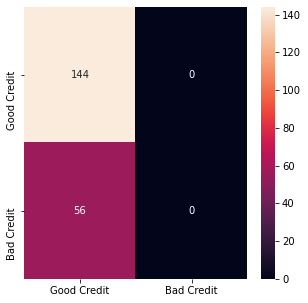

In [1086]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

print("Confusion Matrix: ")
cm = confusion_matrix(y_test, y_predict)
print(cm)

label= ["Good Credit","Bad Credit"]
df_cm = pd.DataFrame(cm, label, label)

plt.figure(figsize = (5,5))
sn.heatmap(df_cm, annot=True, fmt="d")

### 2b. Build and evaluate another ANN (i.e. ann2)
Show the steps to build <i>ann2</i> with a different setting (e.g. different no. of hidden layers and / or neurons, etc.). Explain briefly the different setting of <i>ann2</i>. [0.5 marks]

<b>Answers</b>: 
- I have changed the hidden layers to 6 so it can with a more complex problem

In [1117]:
ann2 = MLPClassifier(hidden_layer_sizes=(6), max_iter=3000, random_state = 3)
ann2.fit(x_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=6, max_iter=3000, random_state=3)

Show the steps to calculate the accuracy of <i>ann2</i> on the training data and testing data, respectively. Is <i>ann2</i> a good model? Explain the reasons. [0.5 marks]<br>

<b>Answers</b>: 
- Overall the training accuracy hasn't changed alot compared to ann1 with Testing accuracy at 72% and Training accuracy at 70% 

In [1118]:
y_predict = ann2.predict(x_test)
x_predict = ann2.predict(x_train)

print('Testing accuracy:', metrics.accuracy_score(y_test, y_predict))
print('Training accuracy:', metrics.accuracy_score(y_train, x_predict))

Testing accuracy: 0.72
Training accuracy: 0.70125


Print and explain the confusion matrix of <i>ann2</i>. Which of <i>ann1</i> and <i>ann2</i> is better, and why? [1 mark]

<b>Answers</b>: 
- ann2 seems to be better due to it's greater training accuracy so it is more reliable

Confusion Matrix: 
[[139   5]
 [ 51   5]]


<AxesSubplot:>

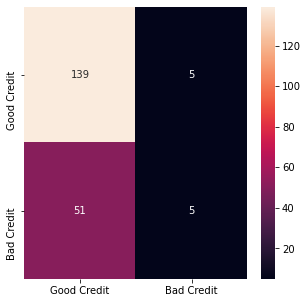

In [1120]:
print("Confusion Matrix: ")
cm = confusion_matrix(y_test, y_predict)
print(cm)

label= ["Good Credit","Bad Credit"]
df_cm = pd.DataFrame(cm, label, label)

plt.figure(figsize = (5,5))
sn.heatmap(df_cm, annot=True, fmt="d")

Use cross-validation, and together with the analysis on their confusion matrix, explain which of <i>ann1</i> and <i>ann2</i> is better. Show the steps to support your analysis. [1.5 marks]

<b>Answers</b>: 
- Judging from the cross-validation score, it is apparent that ann1 scored better with just 0.01 difference. This shows us that ann1 is better than ann2 for analysis

In [1121]:
# Code: 
from sklearn.model_selection import cross_val_score
print(cross_val_score(ann1, x_feature, y_feature.values.ravel(), cv=10, scoring='accuracy').mean())


0.7


In [1122]:
print(cross_val_score(ann2, x_feature, y_feature.values.ravel(), cv=10, scoring='accuracy').mean())

0.69


## Question 3. Decision Tree (12 marks)

### 3a. Build and evaluate your first decision tree (i.e. dt1)

Show the steps to build and train <i>dt1</i> with a depth of 3, using the same settings of data as those for <i>ann1</i> in Question 2a.<br>
Calculate the accuracy of <i>dt1</i> on the training data and testing data, respectively. Explain if <i>dt1</i> is a good model on classifying new customers. [1 mark]

<b>Answers</b>: 
- dt1 is more visual and structured than ann1 which shows us more detail on the model, this makes it a better model for data 


[Text(418.5, 380.52, 'X[5] <= 1.5\ngini = 0.424\nsamples = 800\nvalue = [556, 244]'),
 Text(209.25, 271.8, 'X[7] <= 11.5\ngini = 0.496\nsamples = 436\nvalue = [237, 199]'),
 Text(104.625, 163.07999999999998, 'X[1] <= 0.5\ngini = 0.288\nsamples = 63\nvalue = [52, 11]'),
 Text(52.3125, 54.360000000000014, 'gini = 0.165\nsamples = 44\nvalue = [40, 4]'),
 Text(156.9375, 54.360000000000014, 'gini = 0.465\nsamples = 19\nvalue = [12, 7]'),
 Text(313.875, 163.07999999999998, 'X[7] <= 31.5\ngini = 0.5\nsamples = 373\nvalue = [185, 188]'),
 Text(261.5625, 54.360000000000014, 'gini = 0.496\nsamples = 285\nvalue = [155, 130]'),
 Text(366.1875, 54.360000000000014, 'gini = 0.449\nsamples = 88\nvalue = [30, 58]'),
 Text(627.75, 271.8, 'X[6] <= 4158.0\ngini = 0.217\nsamples = 364\nvalue = [319, 45]'),
 Text(523.125, 163.07999999999998, 'X[0] <= 19.5\ngini = 0.172\nsamples = 285\nvalue = [258, 27]'),
 Text(470.8125, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(575.4375, 54.3600

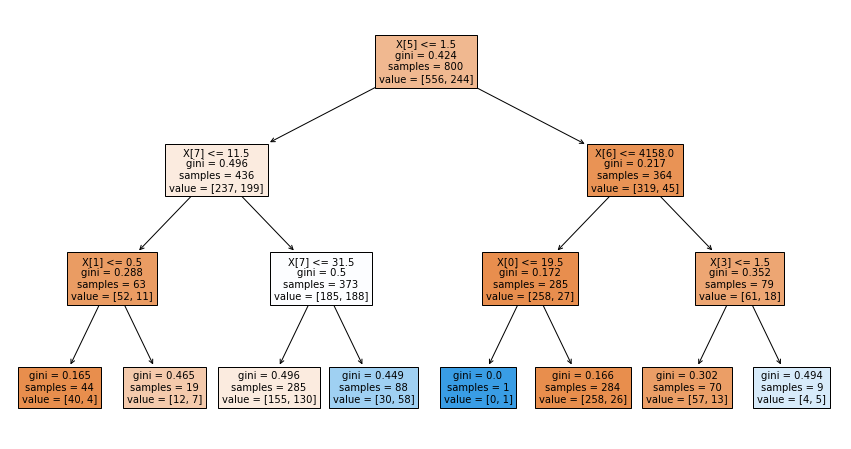

In [1126]:
from sklearn.metrics import confusion_matrix 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report 

dt1 = DecisionTreeClassifier(max_depth = 3, random_state = 5)
dt1.fit(x_train,y_train)

ypredict = dt1.predict(x_test)

plt.figure(figsize=(15,8))
tree.plot_tree(dt1, filled=True, fontsize=10)


Print and explain the confusion matrix of <i>dt1</i>. Is <i>dt1</i> good at predicting 'good' or 'bad' customers? [0.5 marks]

<b>Answers</b>: 
- dt1 is good at predicting good customer as it is closer to index of 1 which represents 'good'


In [1127]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, ypredict))
print("Confusion Matrix: \n",confusion_matrix(y_test, ypredict))

0.72
Confusion Matrix: 
 [[132  12]
 [ 44  12]]


### 3b. Build another decision tree (i.e. dt2)
Remove one input feature from the data and show your steps to build <i>dt2</i> with the reduced data. Observe and explain which input feature affects the accuracy of <i>dt2</i> the most (using k-fold cross-validation). [2 marks]

<b>Answers</b>: 
- The can be seen that the most signifcant score is 'CheckAccount' 
- Removal of this input feature would have the most affect on the accuracy of dt2

In [1132]:
scores = dt1.feature_importances_

inputs = x_train.columns
for x,value in enumerate(scores):
    print(f'{inputs[x]} Score: %.3f' % value)

Age Score: 0.024
Sex Score: 0.030
Job Score: 0.000
Housing Score: 0.032
SavingAccounts Score: 0.000
CheckAccount Score: 0.635
CreditAmount Score: 0.032
Duration Score: 0.249
Purpose Score: 0.000


In [1133]:
dt2 = DecisionTreeClassifier(random_state=5)
dt2.fit(x_train.drop(['CheckAccount'], axis=1),y_train)

ypredict = dt2.predict(x_test.drop(['CheckAccount'], axis=1))
yprecit = cross_val_predict(dt2, x_test, y_test, cv=3)

print(metrics.accuracy_score(y_test, ypredict))

0.63


Show the confusion matrix of <i>dt2</i> and compare it with that of <i>dt1</i>. How accurate is <i>dt1</i> and <i>dt2</i> (% accuracy) predicting 'bad' customers, respectively? [2 marks]

<b>Answers</b>: 
- It can be seen that dt1 is much more accurate than dt2, as dt2 is missing a significant protion of data. Hence it can be concluded that dt1 is better at predicting data

In [1099]:
print("Confusion Matrix: \n",confusion_matrix(y_test, ypredict))

Confusion Matrix: 
 [[99 45]
 [29 27]]


In practice, would bank managers prefer <i>dt1</i> or <i>dt2</i>, i.e. which one is better at predicting 'good' or 'bad' customers? [1 mark]

<b>Answers</b>: 
- In pracitse dt1 would be much perferred to predict good or bad customers 


### 3c. Tuning your decision decision trees

Experiment with different depths (2~8) of either <i>dt1</i> or <i>dt2</i>. Plot using appropriate method the tree depth against its corresponding accruacy evaluated by cross-validation. [2 marks]

<b>Answers</b>:
- After experimenting with the different amount of depths, corresponding accuracy is highest when depth is at max of 8. This shows more data being processed and hence allows for better prediction

[Text(599.0787259615385, 513.4, 'X[5] <= 1.5\ngini = 0.424\nsamples = 800\nvalue = [556, 244]'),
 Text(287.38341346153845, 453.0, 'X[7] <= 11.5\ngini = 0.496\nsamples = 436\nvalue = [237, 199]'),
 Text(101.94230769230768, 392.6, 'X[1] <= 0.5\ngini = 0.288\nsamples = 63\nvalue = [52, 11]'),
 Text(53.653846153846146, 332.2, 'X[2] <= 2.5\ngini = 0.165\nsamples = 44\nvalue = [40, 4]'),
 Text(21.46153846153846, 271.8, 'X[4] <= 0.5\ngini = 0.053\nsamples = 37\nvalue = [36, 1]'),
 Text(10.73076923076923, 211.39999999999998, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(32.19230769230769, 211.39999999999998, 'X[0] <= 30.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(21.46153846153846, 151.0, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(42.92307692307692, 151.0, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(85.84615384615384, 271.8, 'X[5] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(75.11538461538461, 211.39999999999998, 'X[0] <= 40.0\ngini = 0.375\nsamples = 

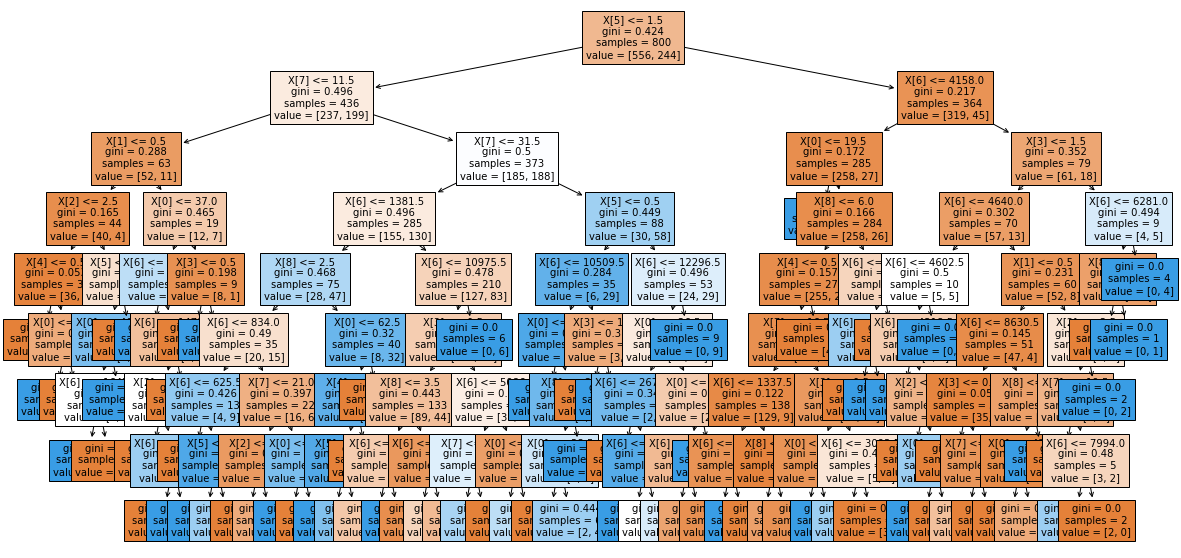

In [1100]:
dt2 = DecisionTreeClassifier(max_depth = 8, random_state = 5)
dt2.fit(x_train,y_train)

ypredict = dt2.predict(x_test)

plt.figure(figsize=(20,10))
tree.plot_tree(dt2, filled=True, fontsize=10)

In [1101]:
evaluation = (cross_val_score(dt2, x_train, y_train, cv=10, scoring='accuracy').mean())
print(" Corresponding Accuracy is ", evaluation)

 Corresponding Accuracy is  0.7125000000000001


In real-life, which tree depth would you select for better and easier decision making? Breifly explain the reasons. [0.5 marks]

<b>Answers</b>: 
- In real life, a tree depth of 3 should be enough for easy and better decision making. This provides enough decision nodes to make a judgement.
- However greater depth could increase accuracy 

### 3d. Decision making with the decision tree

Visualise your best decision tree model. Extract and explain one example rule from the tree (with regard to its branches and nodes). [1.5 marks]

<b>Answers</b>: 
- my best decision tree model is one with a depth of 3, as it is clear and concise to make decions based of the branches and nodes. 

[Text(418.5, 380.52, 'X[5] <= 1.5\ngini = 0.424\nsamples = 800\nvalue = [556, 244]'),
 Text(209.25, 271.8, 'X[7] <= 11.5\ngini = 0.496\nsamples = 436\nvalue = [237, 199]'),
 Text(104.625, 163.07999999999998, 'X[1] <= 0.5\ngini = 0.288\nsamples = 63\nvalue = [52, 11]'),
 Text(52.3125, 54.360000000000014, 'gini = 0.165\nsamples = 44\nvalue = [40, 4]'),
 Text(156.9375, 54.360000000000014, 'gini = 0.465\nsamples = 19\nvalue = [12, 7]'),
 Text(313.875, 163.07999999999998, 'X[7] <= 31.5\ngini = 0.5\nsamples = 373\nvalue = [185, 188]'),
 Text(261.5625, 54.360000000000014, 'gini = 0.496\nsamples = 285\nvalue = [155, 130]'),
 Text(366.1875, 54.360000000000014, 'gini = 0.449\nsamples = 88\nvalue = [30, 58]'),
 Text(627.75, 271.8, 'X[6] <= 4158.0\ngini = 0.217\nsamples = 364\nvalue = [319, 45]'),
 Text(523.125, 163.07999999999998, 'X[0] <= 19.5\ngini = 0.172\nsamples = 285\nvalue = [258, 27]'),
 Text(470.8125, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(575.4375, 54.3600

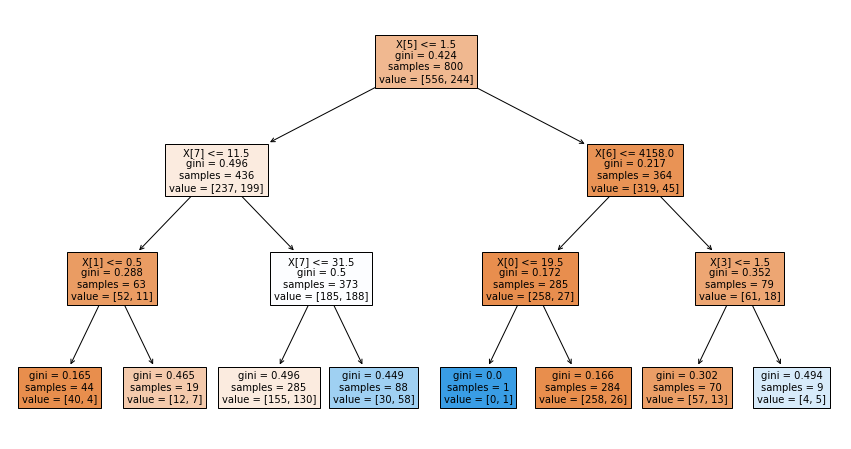

In [1135]:
dt1 = DecisionTreeClassifier(max_depth = 3, random_state = 5)
dt1.fit(x_train,y_train)

ypredict = dt1.predict(x_test)

plt.figure(figsize=(15,8))
tree.plot_tree(dt1, filled=True, fontsize=10)

A new <i>customer A</i> of age 40 with <font color = "red">CreditAmount</font> of 2000 applied to a loan. According to your best decision tree, should the bank manager grant the loan? Explain your reasoning with regard to the tree nodes and branches. [0.5 marks]<br>
Note: a typo corrected on 26/03/2021: <i>CheckAmount</i> is changed to <i>CreditAmount</i> in Question 3d.

<b>Answers</b>: 
- The bank managed should grant the loan as there are credit amounts upto 4158 that is accepted

Based on your above analysis, is decision tree better than neural networks models? Which machine learning model would you recommend the bank manager to use? Why? [1 mark]

<b>Answers</b>: 
- Overall the Decision tree edges above neural network as the corresponding accuracy is higher than that of neural network. 
- Decision trees also is easier to read and interpret with better structure, and more depth can be added to recommend more accurate decisions
- This means that you can appropriate customer decisions with more efficiency 

## Appendix. Coursework Instructions

## Introduction

<b>Main tasks</b>: to build and analyse decision trees and neural networks for a classification task. Support of coursework include:
- Lab demos of data processing and machine learning models using different functions and methods in Python for different example problems;
- Example code building and analysing machine learning models, referring to content in COMP1008 on “Machine learning”.
- Q&A support for exercises in the labs to build different models using different methods / functions on example problems.
- In Teams channel 'COMP1008 Coursework': support of common questions in completing the coursework.

<b>Marks</b>: in total 25 marks, allocated on the basis of:
- knowledge and understanding showed when answering the questions in the Jupyter file report,
- how informative and well presented your code, visualisations and results are,
- self-learning ability making use of online resources,
- problem solving skills to achieve the answers and results,
- concise language and ease of reading, i.e. just enough details for others to repeat your methods and obtain the same results.

<b>Format</b>:
- One single .ipynb file named COMP1008cw-XXX.ipynb, where XXX is your username (e.g. psxyz). The .ipynb file should include your code and answers, using the above given .ipynb template (add markdown and code cells as needed).
- You could use additional Python libraries as you wish, in addition to the ones demonstrated in the labs.
- To answer the questions in the COMP1008 coursework, there are multiple ways using different functions / methods to support the analysis. All answers and analysis should be supported by the code implemented in Jupyter Notebook, not by using other means (e.g. Excel, other languages, etc.).
- More details are given in the <a href="https://moodle.nottingham.ac.uk/pluginfile.php/7184288/mod_tabbedcontent/tabcontent/21279/Assessment%20Sheet%20COMP1008.docx">COMP1008 coursework issue form</a>.

<b>Submission</b>: 
- Deadline: 23rd April 2021. Late submission leads to a 10% deduction of your coursework mark on each weekday. Any work submitted one week late will receive a zero mark for the coursework.
- Procedure: in Moodle submit a single .ipynb file named COMP1008cw-XXX.ipynb, where XXX is your username (e.g. psxyz).
- If you can’t submit your coursework on time due to Extenuating Circumstances, please contact Student Services and your personal tutor ASAP.

### Plagiarism vs. Group Discussions

As you should know, plagiarism is completely unacceptable and will be dealt with according to University's standard policies. Students are encouraged to have only general discussions regarding the theory (not the specific coursework questions) when completing the coursework.

It is important that when you actually do your coursework and write the answers, you do it individually. Do NOT, under any circumstances, share your report, code or figures, etc. with anyone else.